<a href="https://colab.research.google.com/github/MehrdadJalali-AI/socialNetworkOptimization/blob/main/Social_Network_Optimization_SNO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Social Network Optimization (SNO) Algorithm

This notebook demonstrates a simple implementation of the **Social Network Optimization (SNO)** algorithm.

The idea is inspired by how information spreads in a social network. Each solution is represented as a node in a graph. High-quality solutions influence their neighbors, guiding the search toward optimal solutions.

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

## Benchmark Functions

We'll use two common test functions: Sphere and Rastrigin.

In [2]:
def sphere(x):
    return sum([xi**2 for xi in x])

def rastrigin(x):
    A = 10
    return A * len(x) + sum([(xi**2 - A * np.cos(2 * np.pi * xi)) for xi in x])

## Initialize Population
We initialize the population as nodes in a graph, where each node is a solution.

In [3]:
def initialize_population(num_nodes, dim, bounds):
    G = nx.erdos_renyi_graph(num_nodes, 0.3)
    for node in G.nodes:
        G.nodes[node]['position'] = np.random.uniform(bounds[0], bounds[1], dim)
        G.nodes[node]['fitness'] = None
    return G

## Evaluate Fitness
Calculate the fitness of each node using the chosen benchmark function.

In [4]:
def evaluate_fitness(G, func):
    for node in G.nodes:
        pos = G.nodes[node]['position']
        G.nodes[node]['fitness'] = func(pos)

## Information Diffusion
Better solutions influence their neighbors.

In [5]:
def diffuse_information(G, alpha=0.5):
    new_positions = {}
    for node in G.nodes:
        neighbors = list(G.neighbors(node))
        if not neighbors:
            continue
        neighbor_fitness = [G.nodes[n]['fitness'] for n in neighbors]
        best_neighbor = neighbors[np.argmin(neighbor_fitness)]
        new_positions[node] = (
            G.nodes[node]['position'] * (1 - alpha) +
            G.nodes[best_neighbor]['position'] * alpha
        )
    for node, pos in new_positions.items():
        G.nodes[node]['position'] = pos

## Optimization Loop
Run the SNO algorithm over multiple iterations.

In [6]:
def sno_optimize(func, dim=2, bounds=(-5.12, 5.12), num_nodes=20, iterations=50):
    G = initialize_population(num_nodes, dim, bounds)
    best_fitness_over_time = []

    for _ in range(iterations):
        evaluate_fitness(G, func)
        diffuse_information(G)
        best_fitness = min([G.nodes[n]['fitness'] for n in G.nodes])
        best_fitness_over_time.append(best_fitness)

    return G, best_fitness_over_time

## Run and Visualize
Run the algorithm on both Sphere and Rastrigin functions and compare convergence.

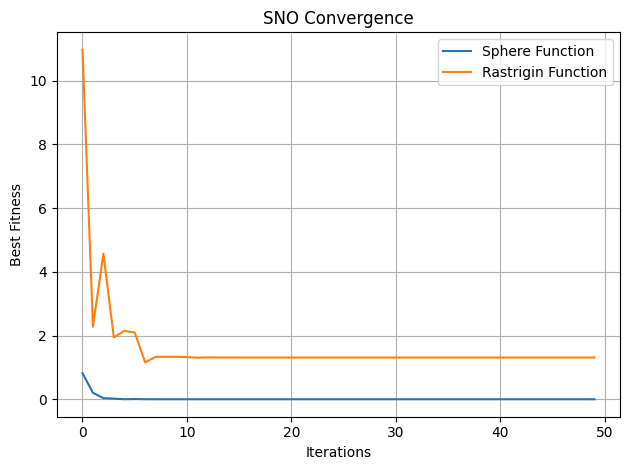

In [7]:
G_sphere, fitness_sphere = sno_optimize(sphere)
G_rastrigin, fitness_rastrigin = sno_optimize(rastrigin)

plt.plot(fitness_sphere, label='Sphere Function')
plt.plot(fitness_rastrigin, label='Rastrigin Function')
plt.xlabel('Iterations')
plt.ylabel('Best Fitness')
plt.title('SNO Convergence')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()